## Observations and Insights 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [92]:
# Checking the number of mice.
len(pd.unique(data_complete["Mouse ID"]))

249

In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = data_complete[data_complete.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicateMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
data_complete.loc[data_complete["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = data_complete[data_complete["Mouse ID"] != "g989"]

In [96]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(cleaned_df["Mouse ID"]))

248

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean_df = cleaned_df.groupby("Drug Regimen", as_index=False)["Tumor Volume (mm3)"].mean()
tumor_mean_df = tumor_mean_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})

tumor_median_df = cleaned_df.groupby("Drug Regimen", as_index=False)["Tumor Volume (mm3)"].median()
tumor_median_df = tumor_median_df.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume (mm3)"})

tumor_variance_df = cleaned_df.groupby("Drug Regimen", as_index=False)["Tumor Volume (mm3)"].var()
tumor_variance_df = tumor_variance_df.rename(columns={"Tumor Volume (mm3)":"Variance of Tumor Volume (mm3)"})

tumor_sd_df = cleaned_df.groupby("Drug Regimen", as_index=False)["Tumor Volume (mm3)"].std()
tumor_sd_df = tumor_sd_df.rename(columns={"Tumor Volume (mm3)":"Std Deviation of Tumor Volume (mm3)"})

tumor_sem_df = cleaned_df.groupby("Drug Regimen", as_index=False)["Tumor Volume (mm3)"].sem()
tumor_sem_df = tumor_sem_df.rename(columns={"Tumor Volume (mm3)":"SEM of Tumor Volume (mm3)"})

summary_stats_groupby = tumor_mean_df.merge(tumor_median_df,on="Drug Regimen").merge(tumor_variance_df,on="Drug Regimen").merge(tumor_sd_df,on="Drug Regimen").merge(tumor_sem_df,on="Drug Regimen")
summary_stats_groupby

,Drug Regimen,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Std Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_df.agg(
    {
        "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"],
    }
)

,Tumor Volume (mm3)
mean,50.435293
median,48.933454
var,79.462907
std,8.914197
sem,0.205591


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

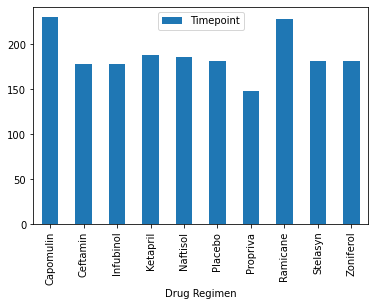

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# bar_plot_df = cleaned_df[["Drug Regimen","Timepoint"]]
# bar_plot_df.plot()

# bar_plot_df = cleaned_df.groupby("Drug Regimen", as_index=False)["Timepoint"]

timepoints_df = cleaned_df[["Timepoint","Drug Regimen"]]

bar_plot_df = timepoints_df.groupby(["Drug Regimen"]).count()

bar_plot_df.plot(kind="bar")

<BarContainer object of 10 artists>

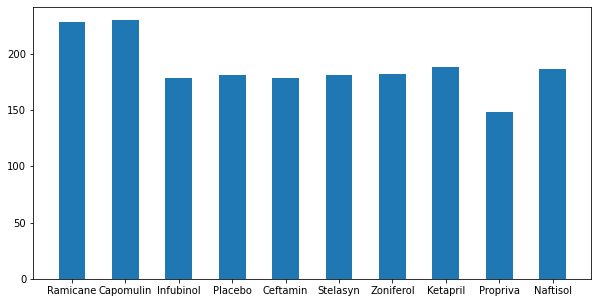

In [100]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

add_drug_df = timepoints_df[["Drug Regimen"]].drop_duplicates(subset = "Drug Regimen")

bar_plot_fixed_df = pd.merge(add_drug_df, bar_plot_df, on="Drug Regimen")

drugs = bar_plot_fixed_df["Drug Regimen"]
timepoint = bar_plot_fixed_df["Timepoint"]


plt.figure(figsize=(10, 5)) 
plt.bar(drugs,timepoint, width = 0.5)


<AxesSubplot:ylabel='% of each Gender'>

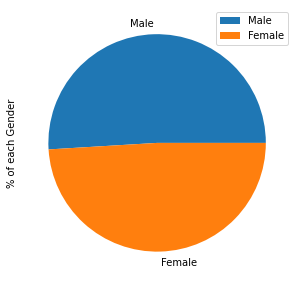

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_df = cleaned_df[["Sex","Mouse ID"]]

pie_plot_df = sex_df.groupby(["Sex"]).count()

add_sex_df = cleaned_df[["Sex"]].drop_duplicates(subset = "Sex")

pie_plot_fixed_df = pd.merge(add_sex_df, pie_plot_df, on="Sex")

# Getting specific values
male = pie_plot_fixed_df.at[0, "Mouse ID"]
female = pie_plot_fixed_df.at[1, "Mouse ID"]


pie_plot_fixed_df = pd.DataFrame({'% of each Gender': [int(male) , int(female)]}, index=["Male", "Female"])



pie_plot_fixed_df.plot.pie(y="% of each Gender", figsize=(5, 5))


([<matplotlib.patches.Wedge at 0x271845206d0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

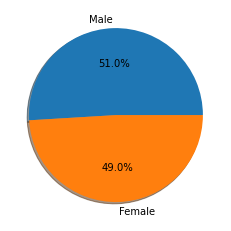

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = "Male" , "Female"
amounts = int(male) , int(female)

plt.pie(amounts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)

## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


cleaned_promising_drugs_df = cleaned_df.loc[cleaned_df["Drug Regimen"] != ("Placebo")]
cleaned_promising_drugs_df = cleaned_promising_drugs_df.loc[cleaned_promising_drugs_df["Drug Regimen"] != ("Stelasyn")]
cleaned_promising_drugs_df = cleaned_promising_drugs_df.loc[cleaned_promising_drugs_df["Drug Regimen"] != ("Zoniferol")]
cleaned_promising_drugs_df = cleaned_promising_drugs_df.loc[cleaned_promising_drugs_df["Drug Regimen"] != ("Ketapril")]
cleaned_promising_drugs_df = cleaned_promising_drugs_df.loc[cleaned_promising_drugs_df["Drug Regimen"] != ("Propriva")]
cleaned_promising_drugs_df = cleaned_promising_drugs_df.loc[cleaned_promising_drugs_df["Drug Regimen"] != ("Naftisol")]

# Start by getting the last (greatest) timepoint for each mouse
promising_drugs_end = cleaned_promising_drugs_df.loc[cleaned_promising_drugs_df["Timepoint"] == 45]
box_plot_df = promising_drugs_end[["Drug Regimen","Tumor Volume (mm3)"]]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [104]:
capomulin_stats_df = box_plot_df.loc[box_plot_df["Drug Regimen"] == ("Capomulin")].describe()
capomulin_stats_df

,Tumor Volume (mm3)
count,21.000000
mean,36.236114
std,5.608969
min,23.343598
25%,32.377357
50%,37.311846
75%,40.159220
max,47.685963


In [105]:
IQR_capomulin = capomulin_stats_df.at["75%", "Tumor Volume (mm3)"] - capomulin_stats_df.at["25%", "Tumor Volume (mm3)"]

print("IQR for Capomulin is then calculated as " + str(capomulin_stats_df.at["75%", "Tumor Volume (mm3)"]) + "-" + str(capomulin_stats_df.at["25%", "Tumor Volume (mm3)"]) + " which is "+ str(IQR_capomulin))



IQR for Capomulin is then calculated as 40.1592203-32.37735684 which is 7.781863460000004


In [106]:

print("Going by the +- 1.5 IQR rule for outliers, anything over " + str(capomulin_stats_df.at["75%", "Tumor Volume (mm3)"] + (1.5 * IQR_capomulin)) + " is an outlier, and anything under " + str(capomulin_stats_df.at["25%", "Tumor Volume (mm3)"] - (IQR_capomulin*1.5)) + " is an outlier" )

Going by the +- 1.5 IQR rule for outliers, anything over 51.83201549 is an outlier, and anything under 20.70456164999999 is an outlier


In [107]:
ramicane_stats_df = box_plot_df.loc[box_plot_df["Drug Regimen"] == ("Ramicane")].describe()
ramicane_stats_df

,Tumor Volume (mm3)
count,20.000000
mean,34.955595
std,5.486439
min,22.050126
25%,30.981175
50%,34.848627
75%,38.508305
max,45.220869


In [108]:
IQR_ramicane = ramicane_stats_df.at["75%", "Tumor Volume (mm3)"] - ramicane_stats_df.at["25%", "Tumor Volume (mm3)"]

print("IQR for Ramicane is then calculated as " + str(ramicane_stats_df.at["75%", "Tumor Volume (mm3)"]) + "-" + str(ramicane_stats_df.at["25%", "Tumor Volume (mm3)"]) + " which is "+ str(IQR_ramicane))


IQR for Ramicane is then calculated as 38.5083053075-30.981175225 which is 7.527130082500001


In [109]:
print("Going by the +- 1.5 IQR rule for outliers, anything over " + str(ramicane_stats_df.at["75%", "Tumor Volume (mm3)"] + (1.5 * IQR_ramicane)) + " is an outlier, and anything under " + str(ramicane_stats_df.at["25%", "Tumor Volume (mm3)"] - (IQR_ramicane*1.5)) + " is an outlier" )

Going by the +- 1.5 IQR rule for outliers, anything over 49.79900043125001 is an outlier, and anything under 19.69048010125 is an outlier


In [110]:
infubinol_stats_df = box_plot_df.loc[box_plot_df["Drug Regimen"] == ("Infubinol")].describe()
infubinol_stats_df

,Tumor Volume (mm3)
count,9.000000
mean,65.755562
std,3.433282
min,60.918767
25%,62.754451
50%,66.083066
75%,67.685569
max,72.226731


In [111]:
IQR_infubinol = infubinol_stats_df.at["75%", "Tumor Volume (mm3)"] - infubinol_stats_df.at["25%", "Tumor Volume (mm3)"]

print("IQR for Infubinol is then calculated as " + str(infubinol_stats_df.at["75%", "Tumor Volume (mm3)"]) + "-" + str(infubinol_stats_df.at["25%", "Tumor Volume (mm3)"]) + " which is "+ str(IQR_infubinol))

IQR for Infubinol is then calculated as 67.68556862-62.75445141 which is 4.9311172099999965


In [112]:
print("Going by the +- 1.5 IQR rule for outliers, anything over " + str(infubinol_stats_df.at["75%", "Tumor Volume (mm3)"] + (1.5 * IQR_infubinol)) + " is an outlier, and anything under " + str(infubinol_stats_df.at["25%", "Tumor Volume (mm3)"] - (IQR_infubinol*1.5)) + " is an outlier" )

Going by the +- 1.5 IQR rule for outliers, anything over 75.08224443499999 is an outlier, and anything under 55.35777559500001 is an outlier


In [113]:
ceftamin_stats_df = box_plot_df.loc[box_plot_df["Drug Regimen"] == ("Ceftamin")].describe()
ceftamin_stats_df

,Tumor Volume (mm3)
count,13.000000
mean,64.132421
std,3.253497
min,59.741901
25%,61.433892
50%,64.299830
75%,67.527482
max,68.923185


In [114]:
IQR_ceftamin = ceftamin_stats_df.at["75%", "Tumor Volume (mm3)"] - ceftamin_stats_df.at["25%", "Tumor Volume (mm3)"]

print("IQR for Ceftamin is then calculated as " + str(ceftamin_stats_df.at["75%", "Tumor Volume (mm3)"]) + "-" + str(ceftamin_stats_df.at["25%", "Tumor Volume (mm3)"]) + " which is "+ str(IQR_ceftamin))

IQR for Ceftamin is then calculated as 67.52748237-61.43389223 which is 6.093590140000003


In [115]:
print("Going by the +- 1.5 IQR rule for outliers, anything over " + str(ceftamin_stats_df.at["75%", "Tumor Volume (mm3)"] + (1.5 * IQR_ceftamin)) + " is an outlier, and anything under " + str(ceftamin_stats_df.at["25%", "Tumor Volume (mm3)"] - (IQR_ceftamin*1.5)) + " is an outlier" )

Going by the +- 1.5 IQR rule for outliers, anything over 76.66786758 is an outlier, and anything under 52.29350701999999 is an outlier


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='[Drug Regimen]'>

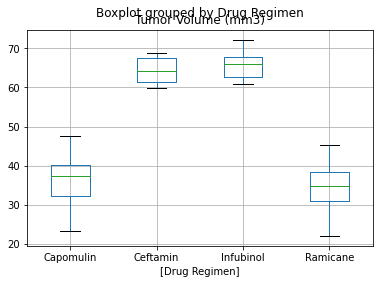

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot_df.boxplot(by="Drug Regimen")


## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

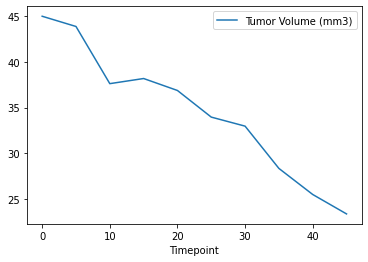

In [117]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == ("Capomulin")]
line_plot_df = line_plot_df.loc[line_plot_df["Mouse ID"] == ("s185")]
line_plot_df = line_plot_df[["Timepoint","Tumor Volume (mm3)"]]
line_plot_df.plot("Timepoint","Tumor Volume (mm3)")

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

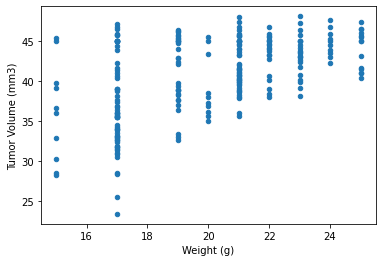

In [118]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == ("Capomulin")]
scatter_plot_df = scatter_plot_df[["Weight (g)","Tumor Volume (mm3)"]]
scatter_plot_df.plot.scatter("Weight (g)","Tumor Volume (mm3)")

## Correlation and Regression

In [119]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == ("Capomulin")]

correlation_df = correlation_df[["Weight (g)","Tumor Volume (mm3)"]]


correlation = correlation_df["Weight (g)"].corr(correlation_df["Tumor Volume (mm3)"])

print("Correlation coefficient between mouse weight and tumor volume is "+ str(correlation))

Correlation coefficient between mouse weight and tumor volume is 0.5256995552077166


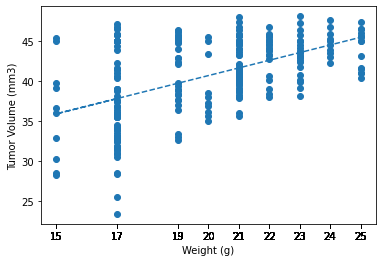

In [120]:
correlation_df = correlation_df.rename(columns={"Weight (g)":"Weight_g","Tumor Volume (mm3)":"Tumor_Volume_mm3"})

w_slope, w_int, w_r, w_p, w_std_err = st.linregress(correlation_df["Weight_g"], correlation_df["Tumor_Volume_mm3"])  


# Create equation of line for linear regression
fit = w_slope * weight + w_int



weight = correlation_df["Weight_g"]
tumor_volume = correlation_df["Tumor_Volume_mm3"]
plt.scatter(weight,tumor_volume)
plt.plot(weight,fit,"--")
plt.xticks(weight, rotation=0)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()